# Language selection

To calculate distances between languages, we used the lang2vec library, which queries the URIEL typological database.
For more information, see the [lang2vec GitHub repository](https://github.com/antonisa/lang2vec?tab=readme-ov-file) and the [original project page](https://www.cs.cmu.edu/~dmortens/projects/7_project/).

**Datasets:**
- *XNLI dataset (7.5k pairs for each language)*: English, French, Spanish, German, Greek, Bulgarian, Russian, Turkish, Arabic, Vietnamese, Thai, Chinese, Hindi, Swahili and Urdu  
- *Universal Dependencies:* English, French, Spanish , German, Greek, Bulgarian, Russian, Turkish, Arabic, Vietnamese, Thai, Chinese, Hindi, Urdu. (Missing: Swahili)  
    - *Parallel Universal Dependencies (PUD):* English, French, Spanish, German, Russian, Turkish, Arabic, Thai, Chinese, Hindi

**Language codes**:
- English: 'eng'   
- French: 'fra'
- Spanish: 'spa'
- German: 'deu'
- Greek: 'ell'
- Bulgarian: 'bul'
- Russian: 'rus'
- Turkish: 'tur'
- Arabic: 'arb'
- Vietnamese: 'vie'
- Thai: 'tha'
- Chinese: 'zho'
- Hindi: 'hin'
- Urdu: 'urd'
- Swahili: 'swa'

**Open questions:**
- For UD: Do we merge datasets for the same language together? Or do we just use parallel datasets? What about evaluation?


## Distance calculation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lang2vec import lang2vec as l2v
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In [11]:
languages = ['eng', 'fra', 'spa', 'deu', 'ell', 'bul', 'rus', 'tur', 'arb', 'vie', 'tha', 'zho', 'hin', 'urd']
lang_available_uriel = l2v.available_uriel_languages()
lang_available_learned = l2v.available_learned_languages()

[lang for lang in languages if lang not in lang_available_uriel and lang not in lang_available_learned]

[]

In [29]:
# Example

distance_matrix = l2v.syntactic_distance(languages)
distance_df = pd.DataFrame(distance_matrix, index=languages, columns=languages)

distance_df

,eng,fra,spa,deu,ell,bul,rus,tur,arb,vie,tha,zho,hin,urd
eng,0.00,0.46,0.40,0.42,0.52,0.48,0.49,0.70,0.67,0.57,0.56,0.57,0.59,0.67
fra,0.46,0.00,0.41,0.46,0.47,0.50,0.51,0.68,0.67,0.61,0.62,0.57,0.58,0.70
spa,0.40,0.41,0.00,0.50,0.41,0.41,0.45,0.65,0.68,0.62,0.61,0.56,0.57,0.70
deu,0.42,0.46,0.50,0.00,0.46,0.54,0.42,0.64,0.74,0.72,0.70,0.58,0.53,0.66
ell,0.52,0.47,0.41,0.46,0.00,0.52,0.45,0.59,0.64,0.66,0.69,0.54,0.55,0.69
bul,0.48,0.50,0.41,0.54,0.52,0.00,0.46,0.67,0.64,0.58,0.64,0.61,0.59,0.58
rus,0.49,0.51,0.45,0.42,0.45,0.46,0.00,0.63,0.67,0.66,0.63,0.57,0.50,0.62
tur,0.70,0.68,0.65,0.64,0.59,0.67,0.63,0.00,0.77,0.82,0.78,0.55,0.60,0.68
arb,0.67,0.67,0.68,0.74,0.64,0.64,0.67,0.77,0.00,0.62,0.68,0.67,0.74,0.74
vie,0.57,0.61,0.62,0.72,0.66,0.58,0.66,0.82,0.62,0.00,0.42,0.66,0.75,0.75


Processing: syntactic distance...


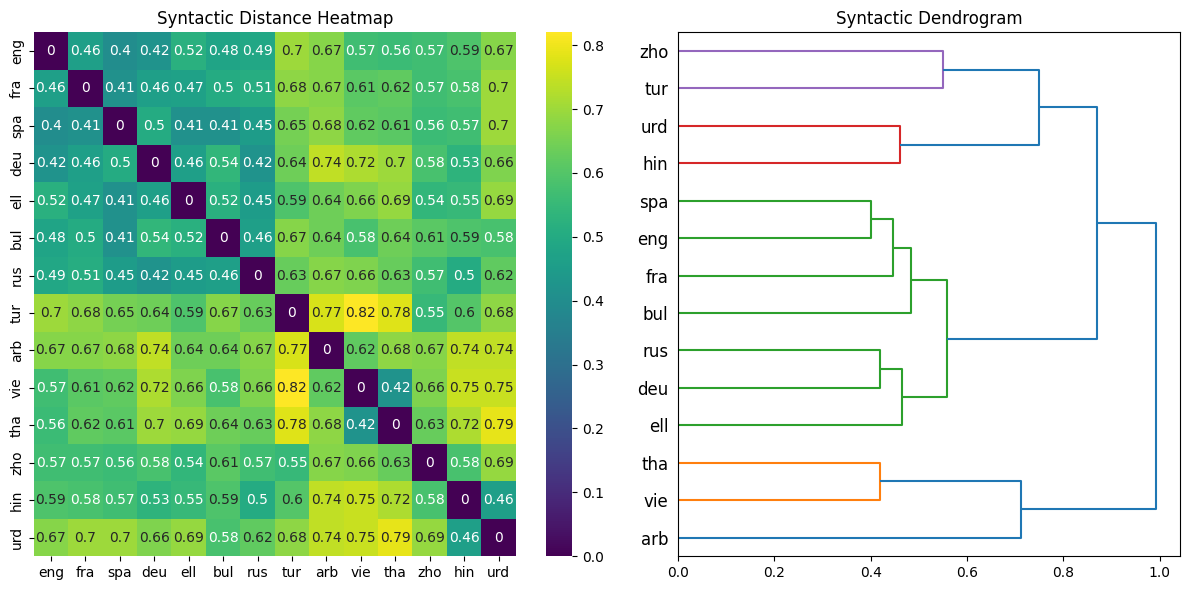

Processing: geographic distance...


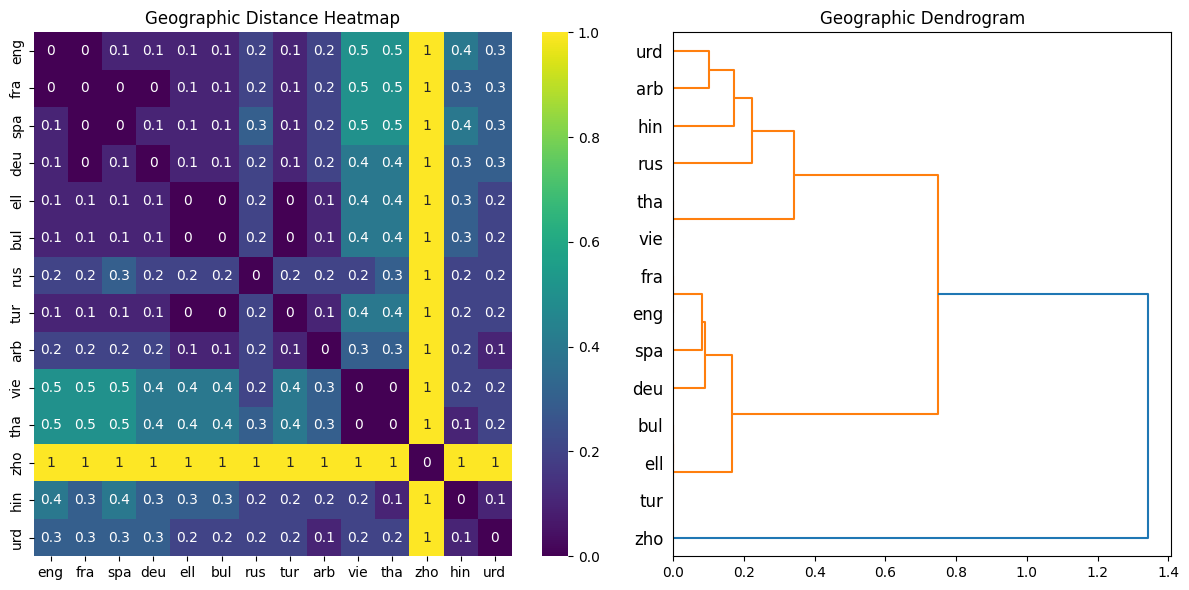

Processing: phonological distance...


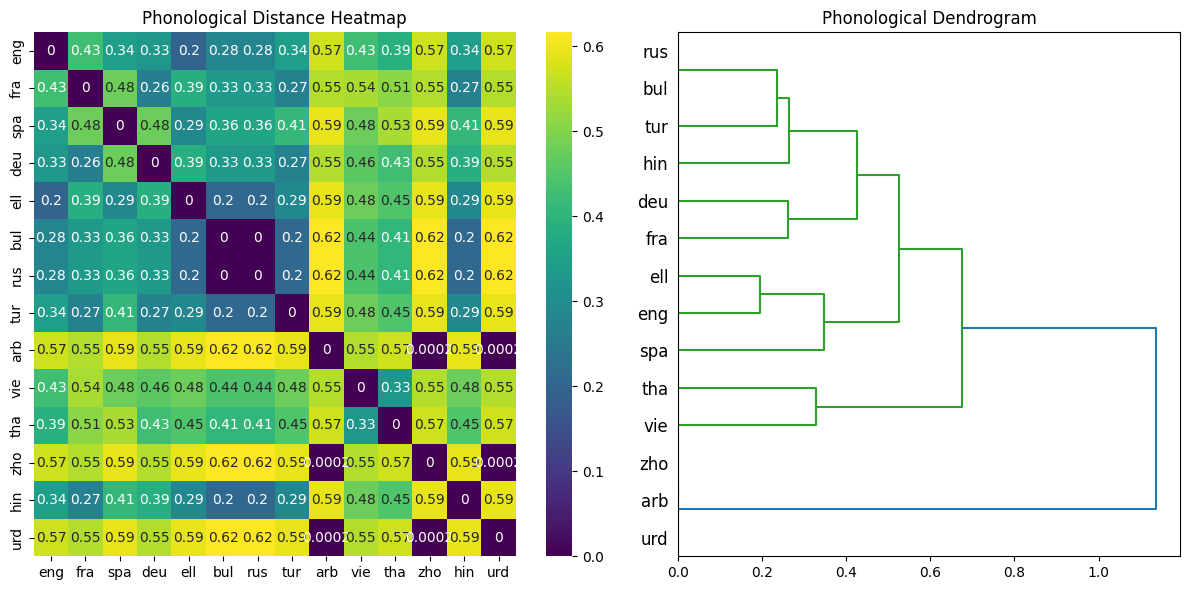

Processing: genetic distance...


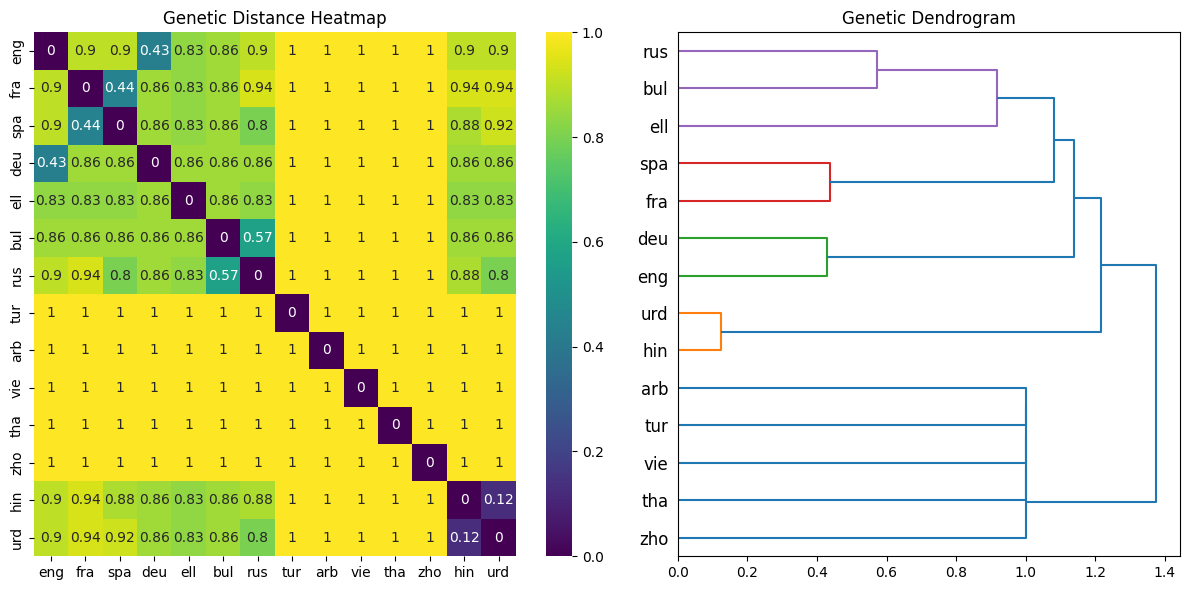

Processing: inventory distance...


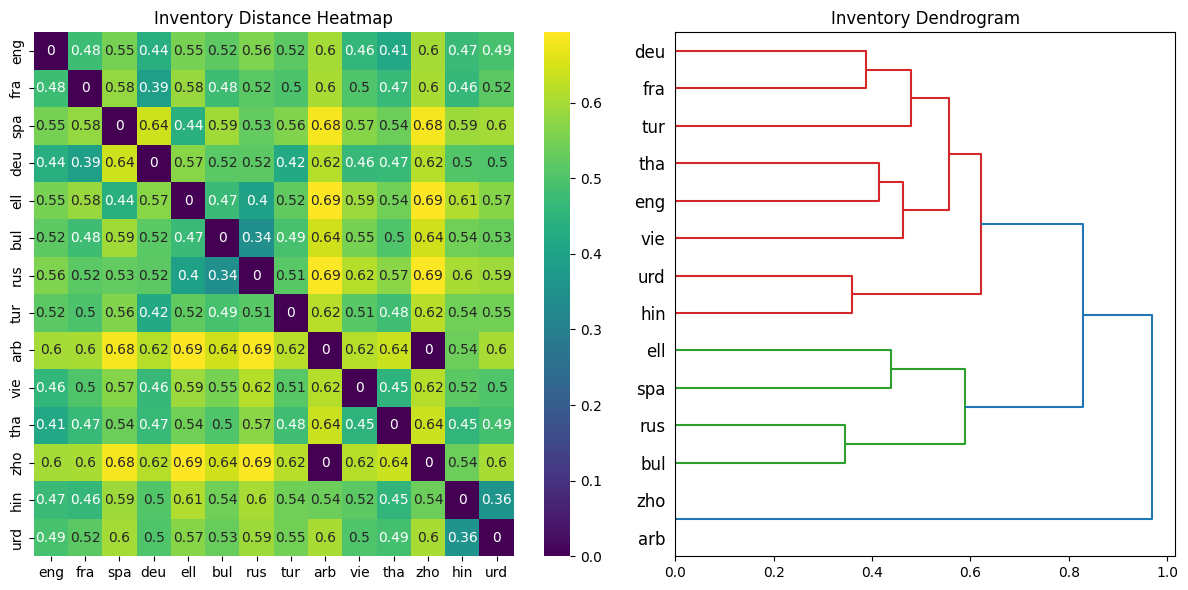

Processing: featural distance...


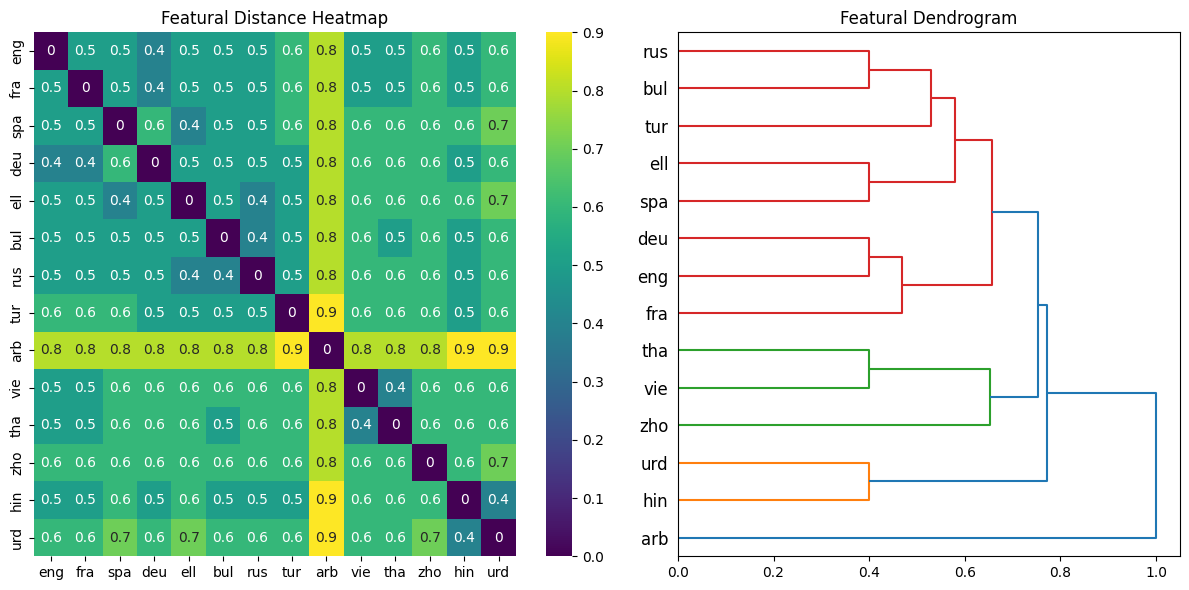

In [30]:
# Distance types to visualize
distance_types = [
    'syntactic',
    'geographic',
    'phonological',
    'genetic',
    'inventory',
    'featural'
]

# Combined plot for each distance type
for dist_type in distance_types:
    print(f"Processing: {dist_type} distance...")

    # Get distance function and matrix
    dist_func = getattr(l2v, f"{dist_type}_distance")
    distance_matrix = dist_func(languages)
    dist_df = pd.DataFrame(distance_matrix, index=languages, columns=languages)

    # Compute linkage for dendrogram
    condensed = squareform(distance_matrix)
    linked = linkage(condensed, method='ward')

    # Create subplot: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1.2, 1]})

    # Heatmap on the left
    sns.heatmap(dist_df, ax=axes[0], cmap='viridis', annot=True,
                xticklabels=True, yticklabels=True, cbar=True)
    axes[0].set_title(f"{dist_type.capitalize()} Distance Heatmap")

    # Dendrogram on the right
    dendrogram(linked, labels=languages, orientation='right', ax=axes[1])
    axes[1].set_title(f"{dist_type.capitalize()} Dendrogram")

    plt.tight_layout()
    plt.show()

## Conclusion

Let’s select our languages based on featural distances, which take into account a combination of phonological, morphological, and syntactic features.

Using the heatmap and dendrogram above as reference, we propose the following configuration for our experiments:


| #  | Target Language (TL) | Closely Related Language (CL) (≤ 0.4) | Distant Language (DL) (≥ 0.7)         |
|----|----------------------|----------------------------------------|----------------------------------------|
| 1  | **eng**              | **deu**                                | **arb**                                |
| 2  | **fra**              | **deu**                                | **arb**                                |
| 3  | **spa**              | ell                                    | **arb**, urd                           |
| 4  | **deu**              | **eng**, **fra**                       | **arb**                                |
| 5  | ell                  | **spa**, **rus**                       | **arb**, urd                           |
| 6  | bul                  | **rus**                                | **arb**                                |
| 7  | **rus**              | bul, ell                               | **arb**                                |
| 8  | **tur**              | –                                      | **arb**                                |
| 9  | **arb**              | –                                      | **tur**, **hin**, urd, etc.            |
| 10 | vie                  | **tha**                                | **arb**                                |
| 11 | **tha**              | vie                                    | **arb**                                |
| 12 | **zho**              | –                                      | **arb**, urd                           |
| 13 | **hin**              | urd                                    | **arb**                                |
| 14 | urd                  | hin                                    | **arb**, **spa**, ell, **zho**         |


**Note:** Languages in bold are available in the parallel Universal Dependencies (UD) dataset. It may be beneficial to use these as target languages to ensure consistency across datasets.


As an initial setup for the experiments, I propose the following language pairings 

| #  | TL <--> CL         | DL        |
|----|--------------------------------------------|-------------------------------|
| 1  | **fra** <--> **deu**                       | **arb**                       |
| 2  | **spa** <--> ell                           | **arb**                       |
| 3  | **rus** <--> bul, ell                      | **arb**                       |
| 4  | **tha** <--> vie                           | **arb**                       |
| 5  | **hin** <--> urd                           | **arb**                       |

